# <center> TP n°1 - Filtrage adapté avec Python </center>

<!-- Image dans le même répertoire ![emetteur N mod complexe](images/image_notebook.png) -->

<img src="https://lh3.googleusercontent.com/d/1lRRAjt4RNj0H38nlSAcgGJCLyddyy09G" align=center width="600"> 

Ce TP présente le filtrage adapté qui permet d'obtenir le plus faible taux d'erreur binaire sur le récepteur dans le cas où le signal est bruité avec un bruit blanc gaussien. On effectuera une comparaison avec un récepteur sans filtre ou avec filtrage passe-bas classique.

## Import des modules

In [244]:
from commNumv4 import Modem
from commNumv4 import Mesure
from commNumv4 import Source
from commNumv4 import Canal
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Ré-import d'une classe du module commNum en cas de modification

Si vous modifiez une classe du module commNum il faut la ré-importer. Par exemple si on a modifié la classe *Source*, il faudra relancer la cellule ci-dessous en commencant par ré-importer une autre classe par exemple *Mesure*, puis relancer un deuxième fois la cellule mais pour la classe *Source*. 

Pour être sûr que le ré-import s'est bien effectué, n'hesitez pas à mettre un print d'une chaîne de caractères différente à chaque ré-import dans votre classe.

In [245]:
import importlib
import commNumv4;from commNumv4 import Source
importlib.reload(commNumv4)

<module 'commNumv4' from 'c:\\Users\\energ\\OneDrive\\Documents\\BUT2\\RT4R02\\TP1\\commNumv4.py'>

<div class="alert alert-block alert-success">
        
## I. Etude du récepteur à filtre adapté/corrélateur pour une modulation PAM4
    
</div>

<div class="alert alert-block alert-info bilan">

### 1. Emetteur et canal AWGN

A l'aide du module commNum, créer un émetteur PAM4 transmettant un signal dans un canal AWGN avec les caractéristiques suivantes :  
    
    
- source : 1000 bits aléatoires  
- 4 symboles de modulation répartis entre 3 et -3  
- Filtre de mise en forme rectangulaire avec un upsampling de 8  
- Bruit blanc gaussien de moyenne nulle et de variance 0.6  
 
     
</div>

In [246]:
########
nbits = 1000
upsampling = 8
mean = 0
variance = 0.6

# Création du signal PAM4
MySource = Source()
bits = MySource.random(nbits)

MyModem = Modem('PAM', 4, bits)

MyMapp = MyModem.mapping(3)

# Filtrage de mise en forme rectangulaire

Hf = MyModem.filtre_MF(MyMapp, upsampling, 'rectangular')

# Canal AWGN
MyCanal = Canal().awgn(Hf, mean, variance)







<div class="alert alert-block alert-info bilan">

Affiche sur le même graphique le signal PAM4 et le signal bruité pour les 16 premiers symboles. Vous utiliserez des lignes pointillées avec des points pour le valeurs : `':o'`.
  
</div>

C:\Users\energ\AppData\Local\Temp\ipykernel_21144\1458663724.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


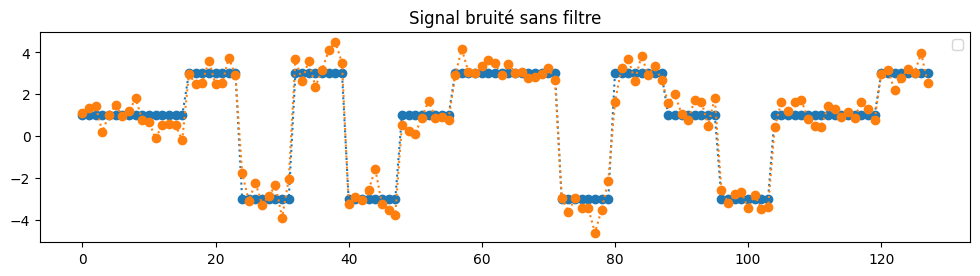

In [247]:
### Affichage des 2 graphs

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.plot(Hf[:16*upsampling], ':o')

plt.title('Signal PAM4')

plt.plot((MyCanal[:16*upsampling]), ':o')


plt.title('Signal bruité sans filtre')

plt.legend()

plt.show()


<div class="alert alert-block alert-info bilan">

### 2. Récepteur

On utilise 3 types de récepteur pour comparer leur taux d'erreur binaire :  
    
    
- **récepteur sans filtre** (downsampling, décision sur le symbole reçu et démapping)  
- **récepteur avec filtre passe-bas classique** (ajout d'un filtre  passe-bas pour améliorer le rapport signal sur bruit)  
- **récepteur avec filtre adapté** (ajout d'un filtre dit adapté correspondant à une corrélation   permettant de maximiser le rapport signal sur bruit aux instants de décisions)  
    

Si l'horloge du récepteur est configuré à la même fréquence que celle de l'émetteur, il existe en pratique un très léger écart en fréquence. De plus l'horloge du récepteur n'est pas synchronisé sur le signal reçu c'est à dire que si on prélève 1 échantillon par temps symbole, celui n'est pas forcément au à l'instant désiré et finit de toute façon par se décaler à cause de l'écart en fréquence entre l'horloge de l'émetteur et du récepteur.  
    
<br>    

Pour résoudre ce problème dit de synchronisation symboles, on prélève N échantillons par temps symbole,  et un algorithme (Gardner ou Muller-Muller par exemple) permet de détecter, à chaque symbole,  quel échantillon parmi les N est au milieu du temps symbole.  
    
<br> 
    
En simulation nous n'avons pas ce problème sauf dans le cas où nous utilisons un filtre qui introduit un retard par rapport aux échantillons émis. On décidera donc manuellement pour le premier symbole, quel échantillon retenir parmis les N lors de l'étape de downsampling.  
    
    
### 2.1 Récepteur sans filtre

A l'aide du module commNum, créer un récepteur sans filtre assurant :  
    
- le downsampling et en retenant l'échantillon au milieu du temps symbole  
- la décision par calcul de distance  
- le démapping  
    

Affiche sur le même graphique le signal reçu bruité et les échantillons retenus pour chaque symbole de modulation, pour les 16 premiers symboles. Vous utiliserez des lignes pointillées avec des points pour le valeurs : `':o'`.  
    
    
</div>

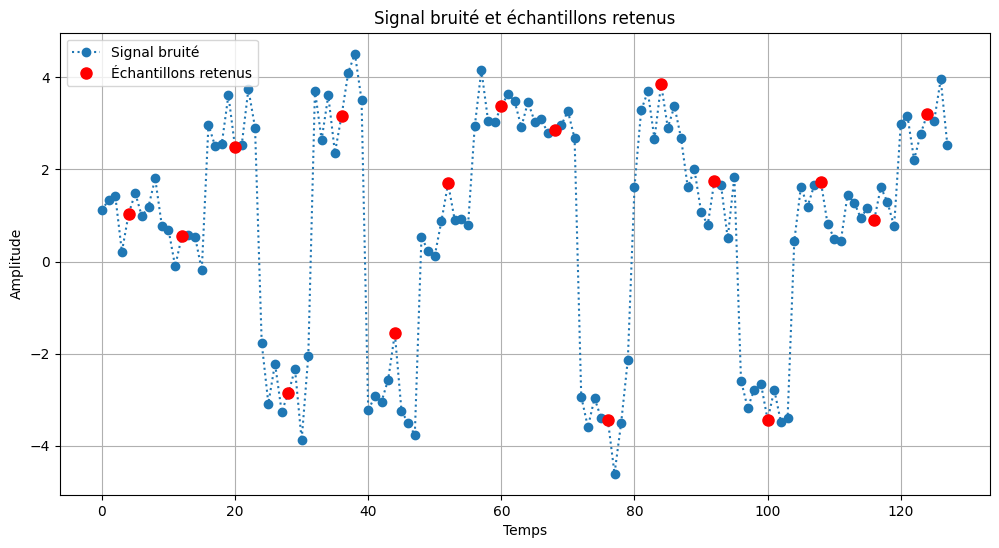

In [248]:
### Récepteur sans filtre

# Downsampling - on prend l'échantillon au milieu du temps symbole
decalage = int(upsampling / 2)  # Pour prendre l'échantillon au milieu
sampled_sig = MyModem.downsample(MyCanal, upsampling, decalage)

# Décision par calcul de distance
detected_symbs = MyModem.detection(sampled_sig)

# Démapping
received_bits = MyModem.demapping(detected_symbs)

# Affichage du signal bruité et des échantillons retenus
plt.figure(figsize=(12, 6))
plt.plot(np.real(MyCanal[:16*upsampling]), ':o', label='Signal bruité')

# Calcul des positions des échantillons retenus
positions = np.arange(decalage, 16*upsampling, upsampling)
plt.plot(positions, np.real(sampled_sig[:16]), 'ro', markersize=8, label='Échantillons retenus')

plt.title('Signal bruité et échantillons retenus')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

<div class="alert alert-block alert-info bilan">

**Taux d'erreur**   
    

Afficher (print) les 16 premiers symboles émis et reçus et le taux d'erreur symbole (sur l'ensemble des symboles). De même, afficher les 16 premiers bits émis et reçus et le taux d'erreur binaire (1 chiffre après la virgule).  
    
<br> 
    
On pourra utiliser la fonction `sum` pour le taux d'erreur en % comme illustré ci-dessous :  
    
`TE = (sum(0 + (symbs_trans - symbs_detect) !=0) / len(symbs_trans)) * 100`

</div>

In [249]:
print(MyMapp[:16])
print(detected_symbs[:16])
TES = (sum(0 - (MyMapp - detected_symbs) !=0) / len(MyMapp)) *100
print(TES)

print(bits[:16])
print(received_bits[:16])
#print(np.size(received_bits))
#print(np.size(bits))
TEB = (sum(0 - (bits - received_bits) !=0) / len(bits)) *100
print(f'{TEB:.1f}')






[ 1.  1.  3. -3.  3. -3.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
[ 1.  1.  3. -3.  3. -1.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
6.4
[1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1]
[1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1]
4.0


<div class="alert alert-block alert-info bilan">

### 2.2 Récepteur avec filtre passe-bas classique

L'essentiel de la puissance du signal est concentré dans son premier lobe alors que la puissance du bruit est répartie sur toutes les fréquences (bruit blanc). Pour améliorer le rapport entre la puissance du signal et la puissance du bruit, on va filtrer le signal à son premier lobe conservant ainsi l'essentiel de la puissance du signal et seulement un tout petit peu de la puissance du bruit.

<!-- Image dans le même répertoire ![emetteur N mod complexe](images/DSP bruit BB.png) -->

<img src="https://lh3.googleusercontent.com/d/1jvmZzciXPnFJyvZLG533Mu0XWy6V73LT" align=center width="500">
    
1. On suppose que le débit binaire est de 2KBits/s. En déduire la rapidité des symboles de modulation compte tenu de la modulation utilisée et la fréquence d'échantillonnage compte tenu du facteur de upsampling.  
    
    
2. Créer un filtre passe-bas (avec la méthode scipy.signal.butter) avec les caractéristiques suivante:
- Ordre 3
- Fréquence de coupure égale à la largeur du lobe principal   
    
    
3. Filtrer le signal reçu avec ce filtre.  
    

4. Affiche le signal PAM4 émis et le signal bruité sur le même graphique. Afficher le signal filtré sur un second graphique. Vous utiliserez des lignes pointillées avec des points pour les valeurs : `':o'`.
 
</div>

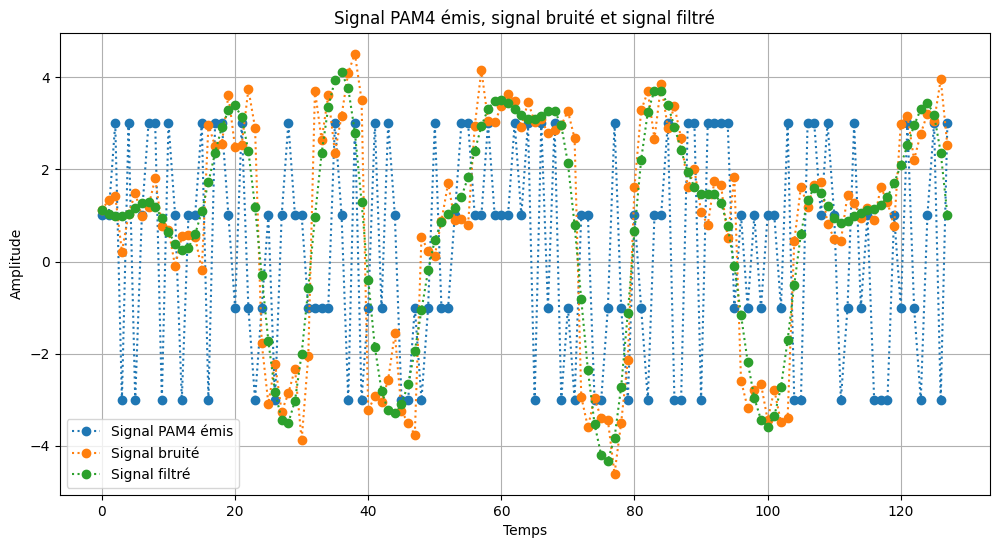

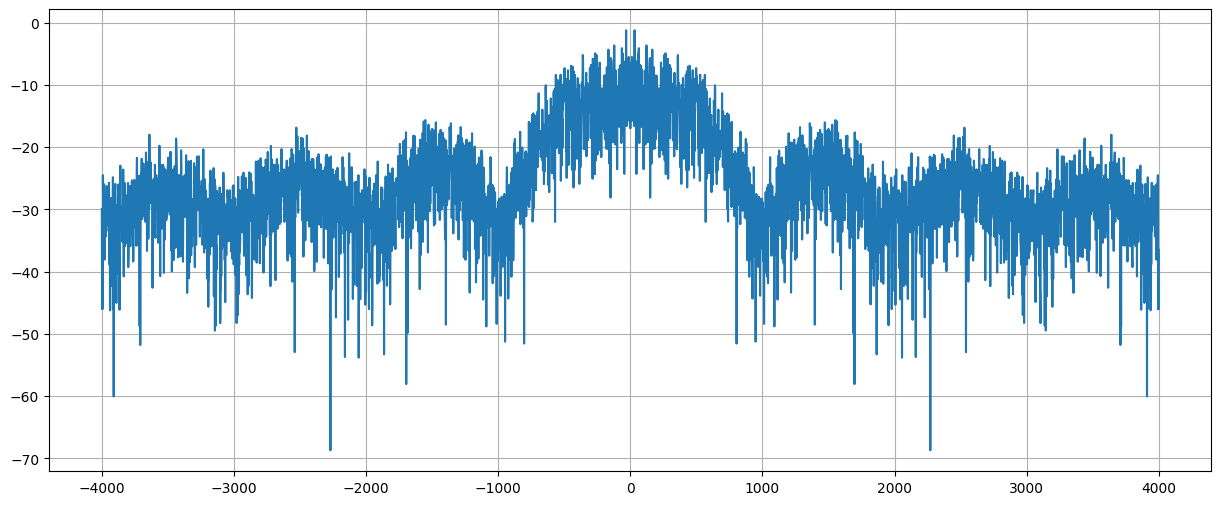

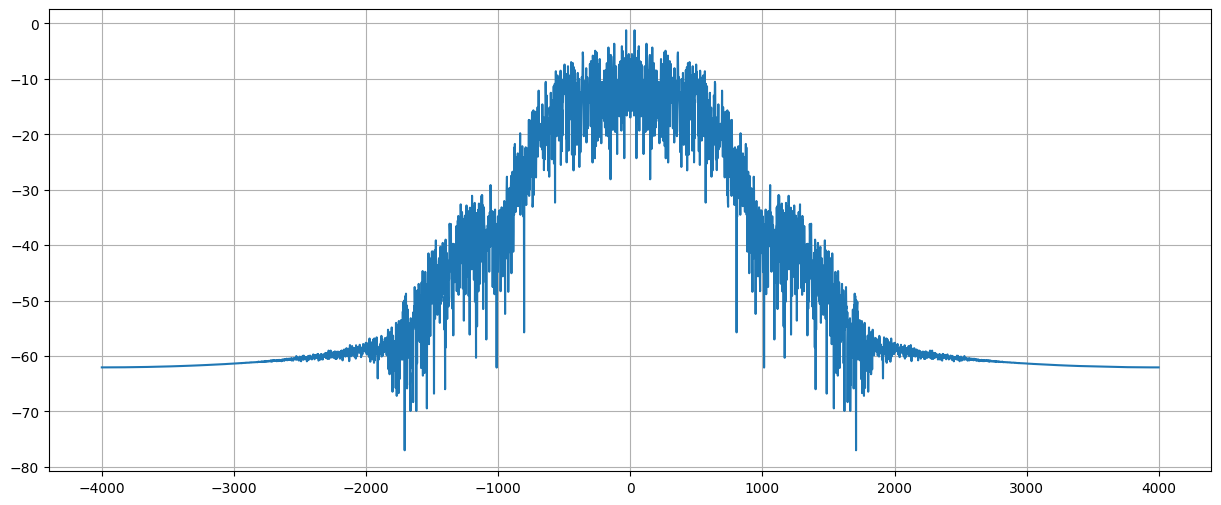

In [250]:
D=2000
R=D/2
fe = R*upsampling

# Création du filtre passe-bas

order = 3
fc_hz = R  # Votre fréquence de coupure en Hz
fc_norm = fc_hz / (fe/2)  # Normalisation: fc/(fe/2)
b, a = scipy.signal.butter(order, fc_norm, 'low', analog=False)

# Filtrage du signal


filtered_sig = scipy.signal.filtfilt(b, a, MyCanal)

# Affichage du signal PAM4 émis et le signal bruité et le signal filtré

plt.figure(figsize=(12, 6))
plt.plot(np.real(MyMapp[:16*upsampling]), ':o', label='Signal PAM4 émis')
plt.plot(np.real(MyCanal[:16*upsampling]), ':o', label='Signal bruité')
plt.plot(np.real(filtered_sig[:16*upsampling]), ':o', label='Signal filtré')

plt.title('Signal PAM4 émis, signal bruité et signal filtré')

plt.xlabel('Temps')

plt.ylabel('Amplitude')

plt.grid(True)

plt.legend()

plt.show()

# DSP en puissance des 3 signaux


MyMsure2 = Mesure.dsp(MyCanal, fe)
MyMsure3 = Mesure.dsp(filtered_sig, fe)




<div class="alert alert-block alert-info bilan">

**Réception avec synchronisation manuelle**

Comme vous pouvez le voir sur la figure précédente, le filtre introduit un retard par rapport au signal à son entrée. Normalement un algortihme de synchronisation vient après le filtre, effectuer le downsampling en choisissant l'échantillon à chaque symbole qui permet de minimiser le taux d'erreur. 
    
Ici nous le ferons de manière manuelle avec la méthode downsampling en choisissant le décalage qui donnera le plus faible taux d'erreur. 
    
Effectuer le downsampling pour un décalage de 4 échantillons, la détection et le démapping
 
</div>

In [251]:
decalage = 5  # Pour prendre l'échantillon au milieu
sampled_sig_filt = MyModem.downsample(filtered_sig, upsampling, decalage)

# Décision par calcul de distance
detected_symbs_filt = MyModem.detection(sampled_sig_filt)

# Démapping
received_bits_filt = MyModem.demapping(detected_symbs_filt)



<div class="alert alert-block alert-info bilan">

**Taux d'erreur**  
    
<br>    
Afficher (print) les 16 premiers symboles émis et reçus et le taux d'erreur symbole (sur l'ensemble des symboles). De même afficher les 16 premiers bits émis et reçus et le taux d'erreur binaire (1 chiffre après la virgule).

</div>

In [252]:
print(MyMapp[:16])
print(detected_symbs_filt[:16])
TES = (sum(0 - (MyMapp - detected_symbs_filt) !=0) / len(MyMapp)) *100
print(TES)

print(bits[:16])
print(received_bits_filt[:16])
#print(np.size(received_bits))
#print(np.size(bits))
TEB = (sum(0 - (bits - received_bits_filt) !=0) / len(bits)) *100
print(f'{TEB:.1f}')

[ 1.  1.  3. -3.  3. -3.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
[ 1.  1.  3. -3.  3. -3.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
0.0
[1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1]
[1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1]
0.0


<div class="alert alert-block alert-info bilan">

**Impact de l'instant d'échantillonnage sur le taux d'erreur**
    
Relancer vos 2 cellules de codes précédentes pour voir le taux d'erreur si le décalage est successivement de 3 échantillons, puis 5 puis 6. Noter les résultats dans la cellule ci-dessous et conclure.

</div>

Décalage de 4 : 0.4 ; 0.2 <br>
Décalage de 3 : 0 ; 0   <br>
Décalage de 5   0;  0    <br>
Décalage de 6   0; 0

<div class="alert alert-block alert-info bilan">

### 2.3 Récepteur avec filtre adapté

Pour ce récepteur on utilise un filtre adapté qui conste à faire un moyenne glissante (pour un filtre de mise en forme rectangulaire en émission) sur les n échantillons par symbole.  
    
<br/>

Le module commNum dispose d'une méthode nommée `moy_glissante`pour effectuer le filtrage adapté dans le cas d'un filtre de mise en forme rectangulaire sur l'émetteur.  

<br/>  
    
**Fonctionnement du corrélateur sur un signal non bruité**  
    
<br>
Effectuer la réception en prenant comme signal reçu le signal émis (non bruité). Afficher pour les 16 premiers symboles le signal émis, le signal après le corrélateur et après downsampling sur le même graphique. Vous prendrez un décalage de 7 pour le dowsampling et vérifirez qu'il s'agit bien du bon échantillon devant être retenu pour chaque symbole de modulation.
    
</div>

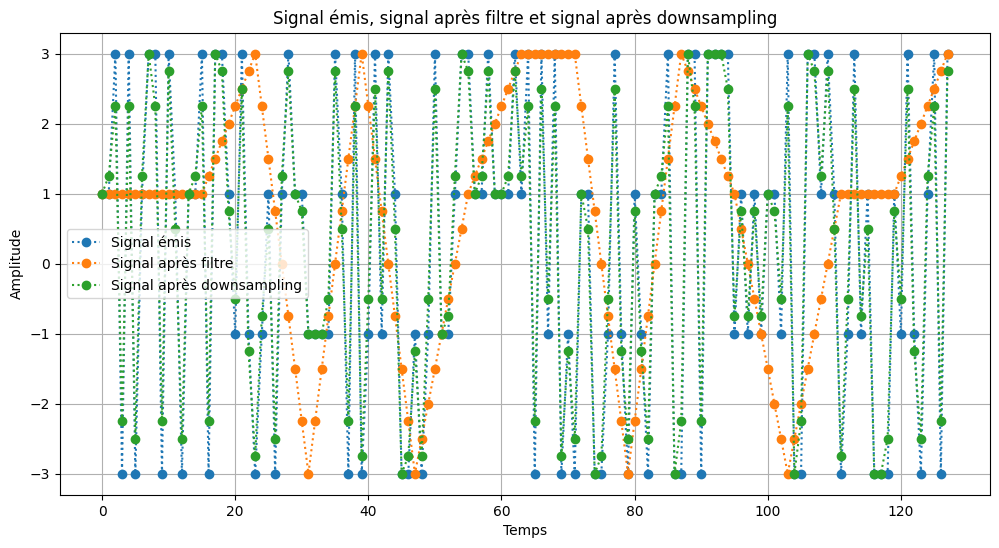

In [253]:
signal_reception = Hf
Filterred = MyModem.filtre_rcv(signal_reception, type='moy_glissante')

sampled_sig_Filterred = MyModem.downsample(Filterred, upsampling, 8)

# Décision par calcul de distance
detected_symbs_Filterred = MyModem.detection(sampled_sig_Filterred)

# Démapping
received_bits_Filterred = MyModem.demapping(detected_symbs_Filterred)

# Affichage des 16 premiers symboles

plt.figure(figsize=(12, 6))
plt.plot(np.real(MyMapp[:16*upsampling]), ':o', label='Signal émis')
plt.plot(np.real(Filterred[:16*upsampling]), ':o', label='Signal après filtre')
plt.plot(np.real(sampled_sig_Filterred[:16*upsampling]), ':o', label='Signal après downsampling')

plt.title('Signal émis, signal après filtre et signal après downsampling')

plt.xlabel('Temps')

plt.ylabel('Amplitude')

plt.grid(True)

plt.legend()

plt.show()



<div class="alert alert-block alert-info bilan">

**Fonctionnement du filtre adapté avec le signal bruité**  
    
<br>
Effectuer la réception avec signal bruité. Afficher pour les 16 premiers symboles : le signal émis, le signal après le corrélateur et après downsampling sur le même graphique.
    
</div>

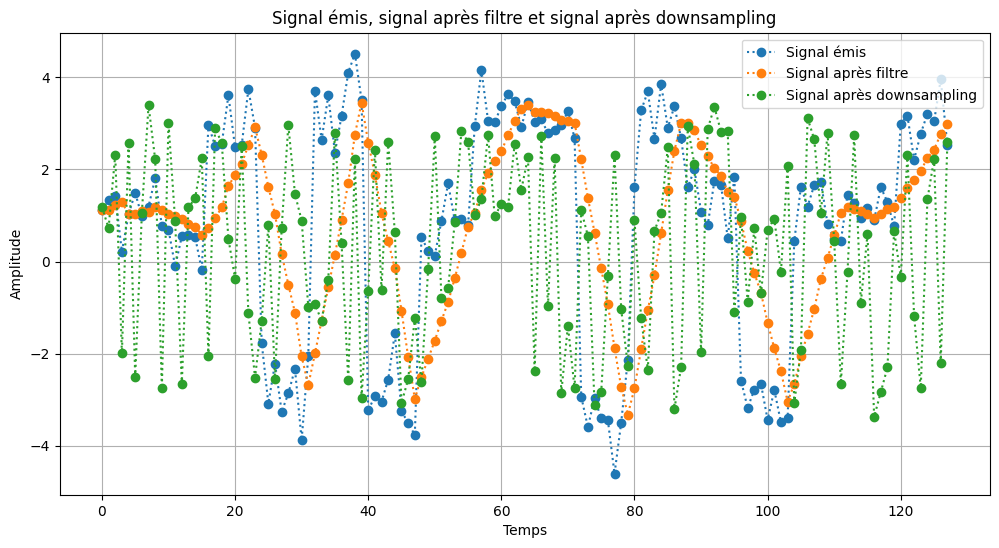

In [254]:
signal_reception = MyCanal
FilterredC = MyModem.filtre_rcv(signal_reception, type='moy_glissante')

sampled_sig_FilterredC = MyModem.downsample(FilterredC, upsampling, 8)

# Décision par calcul de distance
detected_symbs_FilterredC = MyModem.detection(sampled_sig_FilterredC)

# Démapping
received_bits_FilterredC = MyModem.demapping(detected_symbs_FilterredC)


plt.figure(figsize=(12, 6))
plt.plot(np.real(MyCanal[:16*upsampling]), ':o', label='Signal émis')
plt.plot(np.real(FilterredC[:16*upsampling]), ':o', label='Signal après filtre')
plt.plot(np.real(sampled_sig_FilterredC[:16*upsampling]), ':o', label='Signal après downsampling')

plt.title('Signal émis, signal après filtre et signal après downsampling')

plt.xlabel('Temps')

plt.ylabel('Amplitude')

plt.grid(True)

plt.legend()

plt.show()

<div class="alert alert-block alert-info bilan">

**Taux d'erreur avec le récepteur à corrélateur**   
    
<br>    
Afficher (print) les 16 premiers symboles émis et reçus et le taux d'erreur symbole (sur l'ensemble des symboles). De même afficher les 16 premiers bits émis et reçus et le taux d'erreur binaire (1 chiffre après la virgule).

</div>

In [255]:
# Affichage des 16 premiers symboles émis et reçus
print("16 premiers symboles émis :", MyMapp[:16])
print("16 premiers symboles reçus:", detected_symbs_filt[:16])

# Calcul et affichage du taux d'erreur symbole (SER)
symbol_errors = sum(s1 != s2 for s1, s2 in zip(MyMapp, detected_symbs_filt))
ser = symbol_errors / len(MyMapp)
print(f"Taux d'erreur symbole: {ser:.4f} ({symbol_errors}/{len(MyMapp)})")

# Affichage des 16 premiers bits émis et reçus
print("\n16 premiers bits émis :", bits[:16])
print("16 premiers bits reçus:", received_bits_filt[:16])

# Calcul et affichage du taux d'erreur binaire (BER) avec 1 chiffre après la virgule
bit_errors = sum(b1 != b2 for b1, b2 in zip(bits, received_bits_filt))
ber = bit_errors / len(bits)
print(f"Taux d'erreur binaire: {ber:.1f} ({bit_errors}/{len(bits)})")

16 premiers symboles émis : [ 1.  1.  3. -3.  3. -3.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
16 premiers symboles reçus: [ 1.  1.  3. -3.  3. -3.  1.  3.  3. -3.  3.  1. -3.  1.  1.  3.]
Taux d'erreur symbole: 0.0000 (0/500)

16 premiers bits émis : [1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1]
16 premiers bits reçus: [1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1]
Taux d'erreur binaire: 0.0 (0/1000)


<div class="alert alert-block alert-success">
        
## II. Etude du récepteur à filtre adapté/corrélateur pour une modulation 16QAM
    
</div>

<div class="alert alert-block alert-info bilan">

### 1. Rappels sur la réception sur fréquence avec filtre passe-bas pour une modulation 16QAM  
    
<br>    

On rappelle ci-dessous le code Python pour simuler une transmission 16QAM dans un canal AWGN avec le module commNum.  Le filtre passe-bas au niveau du récepteur permet de filtrer les composantes spectrales à $-2.f_p$ après la donwconversion ainsi que le bruit.  
    
<br>  

**Rappel sur le récepteur 16QAM à filtre passe-bas**   

<br>   
   
Exécuter la cellule ci-dessous et la cellule suivante pour vous remémorer l'allure temporelle des signaux à différents endroits de la chaîne de transmission.  Le bruit est pour l'instant nul.  

</div>

In [256]:
###############################################
#### Caractéristiques de la transmission #####
###############################################
#Emetteur
D = 400
nsymb = 16
bits_per_symp = int(np.log2(nsymb))
tb = 1/D
fe = 10000
te = 1/fe
ts = bits_per_symp*tb
R = 1/ts
fp = 500
upsampling = int(fe/R)
#Canal
mean = 0
std = 1.2
#Récepteur
downsample_factor = upsampling

###############################################
##########          Emetteur         ##########
###############################################
#Source
mydata = Source()
bits = mydata.random(5000)
#Création et initialisation des paramètres du modem (création de l'objet)
QAM_mod = Modem('QAM', 16 , bits)
#Mapping
symbs_QAM=QAM_mod.mapping(3)
#Filtre de mise en forme rectangulaire
bb_QAM = QAM_mod.filtre_MF(symbs_QAM, upsampling, 'rectangular')
#Translation de fréquence upconversion
sig_QAM = QAM_mod.upconv(bb_QAM, fp, te)

###############################################
##########          Canal AWGN       ##########
###############################################
mycanal = Canal()
QAM_bruite = mycanal.awgn(sig_QAM, mean, std)

##########################################################
##########  Récepteur à filtre passe-bas classique  ######
##########################################################
#Translation de fréquence downconversion
down1_QAM1 = QAM_mod.downconv(QAM_bruite, fp, te)
#Filtrage à fp
ordre=5
fcn=fp/(fe/2)
b, a = scipy.signal.butter(ordre, fcn, btype='low')
down2_QAM1=2*scipy.signal.lfilter(b, a, down1_QAM1)
#Downsampling
decalage1 = 65
symbs_rcv1 = QAM_mod.downsample(down2_QAM1, downsample_factor, decalage1)
#Détection
symbs_detect1 = QAM_mod.detection(symbs_rcv1)
#Démapping
bits_rcv1 = QAM_mod.demapping(symbs_detect1)

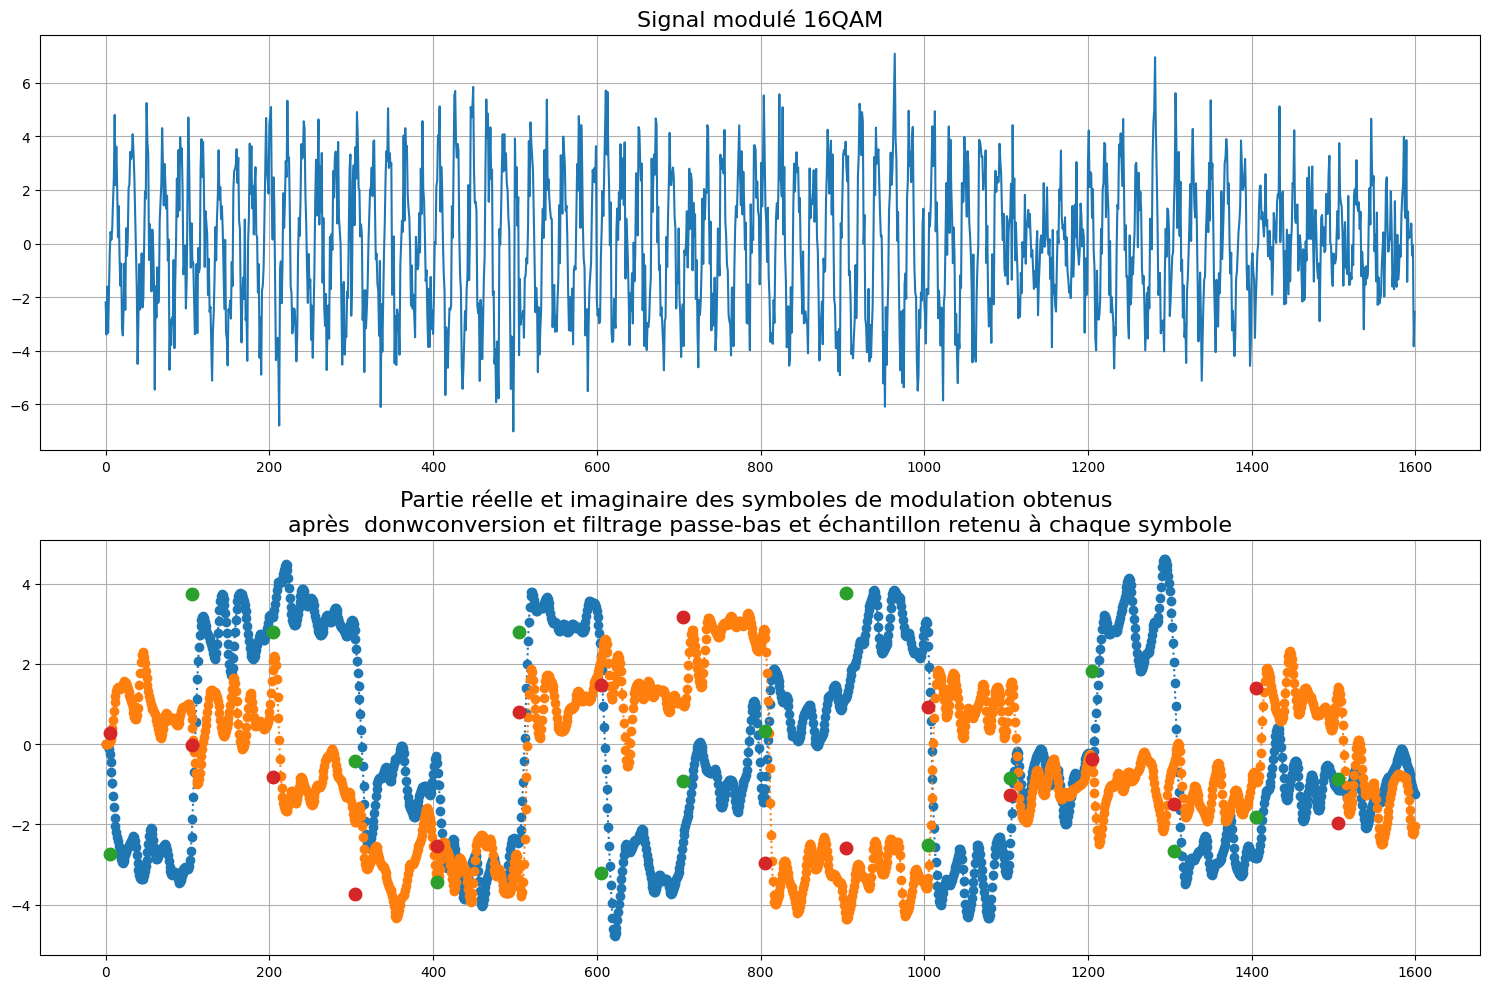

In [257]:
#Affichage du signal reçu et du signal filtré
nsymb_aff = 16
fig, ax = plt.subplots(2,1, figsize = (15, 10))
ax[0].plot(QAM_bruite[0:nsymb_aff*upsampling])
ax[0].grid()
ax[0].set_title("Signal modulé 16QAM", fontsize = 16)
ax[1].plot(np.real(down2_QAM1[0:nsymb_aff*upsampling]), ':o')
ax[1].plot(np.imag(down2_QAM1[0:nsymb_aff*upsampling]), ':o')
ax[1].set_title("Partie réelle et imaginaire des symboles de modulation obtenus \naprès \
 donwconversion et filtrage passe-bas et échantillon retenu à chaque symbole", fontsize = 16)
num_ech = np.arange(decalage, len(down2_QAM1[0:nsymb_aff*upsampling]), upsampling)
ax[1].plot(num_ech, np.real(symbs_rcv1[0:nsymb_aff]), 'o', mew=4)
ax[1].plot(num_ech, np.imag(symbs_rcv1[0:nsymb_aff]), 'o', mew=4)
ax[1].grid()
plt.tight_layout()

<div class="alert alert-block alert-info bilan">

### 2. Remplacement du filtre passe-bas par un filtre adapté  
    
<br>
    
On souhaite remplacer le filtre passe-bas au niveau du récepteur par un filtre adapté pour améliorer le taux d'erreur. Reprendre le code du récepteur en remplaçant le filtre passe-bas par un filtre adapté c'est à dire un simple moyenne glissante dans le cas d'un filtre de mise en forme rectangulaire.  
    
<br>
    
Afficher la partie réelle et imaginaires et symboles de modulation et des échantillons retenus à chaque symbole (vous prendrez un décalage de `downsample_factor-1`).

</div>

<div class="alert alert-block alert-info bilan">

**Impact du bruit blanc gaussien sur les signaux**

Relancer les cellules précédente mais pour un bruit blanc gaussien avec une variance de 1.2 et visualiser les signaux pour le récepteur avec filtre passe-bas et filtre adapté.

</div>

<div class="alert alert-block alert-info bilan">

### 3. Comparaison des taux d'erreur

Calculer les taux d'erreur symboles pour les 2 récepteurs et conclure sur le filtrage adapté.

</div>